In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library yang digunakan**

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import joblib


# **Persiapan data**

**Load Dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CattleDiag/Dataset/dataset.csv')
weight = pd.read_csv('/content/drive/MyDrive/CattleDiag/Dataset/symptom_severity.csv')

**Missing Value**

In [4]:
# Mendapatkan nama kolom dari data frame
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns = df.columns)
# Mengisi data yang kosong dengan nilai 0
df = df.fillna(value=0)

**Mengisi data gejala (Symptom) dengan nilai bobotnya (weight)**

In [5]:
vals = df.values
symptoms = weight['Gejala'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = weight[weight['Gejala'] == symptoms[i]]['Bobot'].values[0]

#df.head()

**Memisahkan antara data dan label**

In [6]:
(df[cols] == 0).all()

df['Penyakit'].value_counts()

df['Penyakit'].unique()

data = df.iloc[:,1:].values
labels = df['Penyakit'].values

df.head()
#df.to_csv('/content/drive/MyDrive/CattleDiag/Dataset/my_data.csv', index=False)

Penyakit Gejala 1 Gejala 2 Gejala 3 Gejala 4 Gejala 5 Gejala 6 Gejala 7  \
0  Pneumonia     15.3     15.3      7.7      2.5     14.2      7.7      2.5   
1  Pneumonia     15.3     15.3      7.7      2.5     14.2      7.7      2.5   
2  Pneumonia     15.3     15.3      7.7      2.5     14.2      7.7     13.0   
3  Pneumonia     15.3     15.3      7.7      2.5     14.2      2.5     13.0   
4  Pneumonia     15.3     15.3      7.7      2.5      7.7      2.5     13.0   

  Gejala 8 Gejala 9 Gejala 10 Gejala 11 Gejala 12 Gejala 13 Gejala 14  \
0     13.0        0         0         0         0         0         0   
1        0        0         0         0         0         0         0   
2        0        0         0         0         0         0         0   
3        0        0         0         0         0         0         0   
4        0        0         0         0         0         0         0   

  Gejala 15 Gejala 16 Gejala 17 Gejala 18 Gejala 19  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0

**Membagi dataset**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3796, 19) (671, 19) (3796,) (671,)


# **Modeling**

**Modeling Support Vector Machine**

In [8]:
svc = SVC()
svc.fit(x_train, y_train)
joblib.dump(svc, "/content/drive/MyDrive/CattleDiag/svc.pkl")

pred_svc = svc.predict(x_test)
# print(pred_svc)

conf_mat = confusion_matrix(y_test, pred_svc)
print('SVC F1-score% =', f1_score(y_test, pred_svc, average='macro')*100, '|', 'SVC Accuracy% =', accuracy_score(y_test, pred_svc)*100)
#SVC F1-score% = 97.39379257298995 | SVC Accuracy% = 97.91356184798808

SVC F1-score% = 97.39379257298995 | SVC Accuracy% = 97.91356184798808


**Modeling Neural Networks**

Konversi vektor ke matriks kelas biner

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder =  LabelEncoder()
y_train_e = encoder.fit_transform(y_train)
y_train_c = to_categorical(y_train_e, num_classes = 41)

y_test_e = encoder.fit_transform(y_test)
y_test_c = to_categorical(y_test_e, num_classes = 41)

joblib.dump(encoder, "/content/drive/MyDrive/CattleDiag/encoder.pkl")
np.save('/content/drive/MyDrive/CattleDiag/classes.npy', encoder.classes_)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [11]:
#Building the RNN
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models

# pembuatan model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# normalisasi tipe data NumPy arrays
x_train = x_train.astype(np.float32)
y_train_c = y_train_c.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test_c = y_test_c.astype(np.float32)

# konversi NumPy arrays ke TensorFlow tensors
x_train_tf = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_c_tf = tf.convert_to_tensor(y_train_c, dtype=tf.float32)
x_test_tf = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test_c_tf = tf.convert_to_tensor(y_test_c, dtype=tf.float32)

# Melatih model dengan data yang telah diproses
epochs = 1000
batch_size = 32
model.fit(x_train_tf, y_train_c_tf, epochs=epochs, batch_size=batch_size)

# Menyimpan model jika diperlukan
model.save('/content/drive/MyDrive/CattleDiag/cattlediag_tf.h5')


Epoch 1/1000
119/119 [==============================] - 2s 3ms/step - loss: 0.0237 - accuracy: 0.0503
Epoch 2/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.1201
Epoch 3/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.2347
Epoch 4/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.2914
Epoch 5/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.3975
Epoch 6/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.5190
Epoch 7/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.6855
Epoch 8/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.8019
Epoch 9/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.8522
Epoch 10/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.005

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
score = model.evaluate(x_test, y_test_c, batch_size=batch_size)

y_pred = model.predict(x_test)

actual = np.argmax(y_test_c, axis=1)
predicted = np.argmax(y_pred, axis=1)

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

print('Neural Network F1-scores% =', f1_score(actual, predicted, average='macro') * 100, '|', 'Neural Network Accuracy% =', accuracy_score(actual, predicted) * 100)
print('Score Accuracy = ', score)
#Neural Network F1-scores% = 93.54319954530733 | Neural Network Accuracy% = 96.42324888226528


21/21 [==============================] - 0s 1ms/step
Actual: [ 9 27  2 29 11 24 15  4  8  1  1  1 12 13 20 16  3 14 19 19 17 19 10 26
 26 16 25  0  6  3  9 17 29  2  3  4 18  8  2 26 14 25 31  4 26 26 20 13
  7 27 31 14 13  6  2  3 13 30  3  8 30 29 15 27  6  9 19 27 15 21 21 23
 30 12  3 14 13 29 24  1  9 10 22 18  0 10 25  1 13  8 27 30 25 10  8  4
 31 15 28 25  3  5  9 15  9 31  4  9 31 30  9 21 23 10 28 18 28 20 17 13
 22 10  9 14  8  0 23 18 26 11 17 29 15 23  2  7 27 20 25 23  0 16 19 20
  6 22 24 16 26  9 23 16 32 20  4 11 16 13 19 13 12 20  5 10 13  9 17 15
 26 11 19 22  0  3 31 18  8  3  1 10 15 23 23 28 24 18  5 16 21 30 11 29
 32  4 27 18 20  8 29 19 18 19 20 26 31 18 26 20 24  8  8  7  7  8 29 11
 21  8  1 22 17 14 25 18 19 17 18 14 29 24 16  2 19  8 32 12 14 22 15 22
 10 27  8 27 11 17 13 30  9 29  5  7 28 30 16 15 25  9 15  3  2 24 24 32
 12 28 16 13 26 14 29 12 23 31 17 24  7 20 31 16 15 14 31 10 22 30 19 24
 31 31 31 23 14 23  6 14 11  2 31 20 29 26 10  0 17 12 13 22 14

In [15]:
def make_plot(history, train, validation, title):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title(title)
    plt.legend(['Training', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.show()


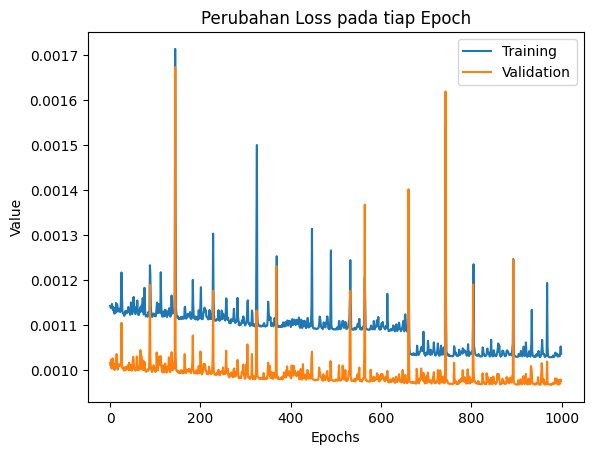

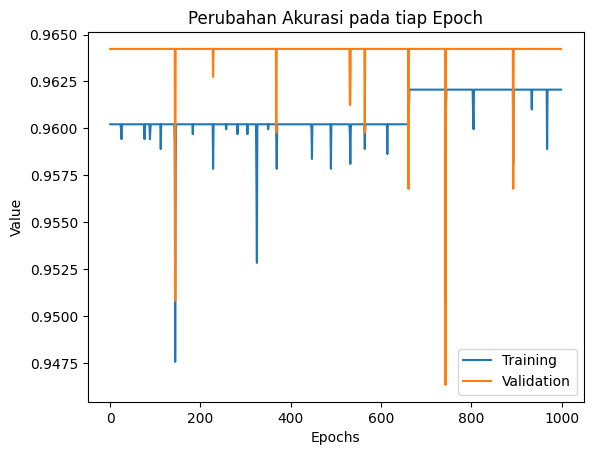

In [19]:
# Setelah Anda memiliki history dari proses pelatihan, Anda dapat menggunakan fungsi make_plot:
make_plot(history, 'loss', 'val_loss', 'Perubahan Loss pada tiap Epoch')
make_plot(history, 'accuracy', 'val_accuracy', 'Perubahan Akurasi pada tiap Epoch')